# US Cars Dataset Analysis



### Information on Dataset
https://www.kaggle.com/doaaalsenani/usa-cers-dataset


*   Price (Integer) - The sale price of the vehicle in the ad
*   Years	(Integer)	- The vehicle registration year
*   Brand	(String) -	The brand of car
*   Model	(String) -	Model of the vehicle
*   Color	(String)- Color of the vehicle
*   State/City (String) -	The location in which the car is being available for purchase
*   Mileage	(Float) -	Miles traveled by vehicle
*   Vin	(String) - The vehicle identification number is a collection of 17 characters (digits and capital letters)
*   Title Status (String) - This feature included binary classification, which are clean title vehicles and salvage insurance
*   Lot	(Integer)	- A lot number is an identification number assigned to a particular quantity or lot of material from a single manufacturer.For cars, a lot number is combined with a serial number to form the Vehicle Identification Number.
*   Condition	(String) - Time

# Preprocessing
Looking at the dataset, we can see there is a redundant index column. Futhermore, Vin and Lot seem to be unusable as predictors, so we drop them from the dataset.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('USA_cars_datasets.csv')
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [2]:
# Drop redundant index column
df.drop(['Unnamed: 0', 'vin', 'lot'], axis=1, inplace=True)
df.head()

,price,brand,model,year,title_status,mileage,color,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa,22 hours left


The rest of the variables besides year and mileage are categorical, so in order to use them in a machine learning model, we first have to figure out how to preprocess them into nominal variables.

## Title Status

There are only two values for title status, clean vehicle and salvage insurance, making one-hot encoding a fitting choice for this variable.

In [3]:
def one_hot_encode(df0, col):
  df = df0.copy()
  dummy_cols = pd.get_dummies(df[col])
  df = pd.concat([df, dummy_cols], axis=1)
  df.drop([col], axis=1, inplace=True)
  return df

df_title = one_hot_encode(df, 'title_status')
df_title

,price,brand,model,year,mileage,color,state,country,condition,clean vehicle,salvage insurance
0,6300,toyota,cruiser,2008,274117.0,black,new jersey,usa,10 days left,1,0
1,2899,ford,se,2011,190552.0,silver,tennessee,usa,6 days left,1,0
2,5350,dodge,mpv,2018,39590.0,silver,georgia,usa,2 days left,1,0
3,25000,ford,door,2014,64146.0,blue,virginia,usa,22 hours left,1,0
4,27700,chevrolet,1500,2018,6654.0,red,florida,usa,22 hours left,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,23609.0,red,california,usa,1 days left,1,0
2495,9200,nissan,versa,2018,34553.0,silver,florida,usa,21 hours left,1,0
2496,9200,nissan,versa,2018,31594.0,silver,florida,usa,21 hours left,1,0
2497,9200,nissan,versa,2018,32557.0,black,florida,usa,2 days left,1,0


## Condition

Condition is a string describing the time before the listing expires. We first look at the possible values of Condition:

In [4]:
df['condition'].value_counts()

2 days left        832
21 hours left      492
3 days left        137
14 hours left      108
1 days left         91
8 days left         82
17 hours left       76
20 hours left       67
9 days left         58
22 hours left       57
6 days left         52
18 hours left       48
19 hours left       45
7 days left         43
11 days left        42
16 hours left       36
2 hours left        26
10 days left        23
Listing Expired     20
29 minutes          18
4 days left         16
5 hours left        16
23 hours left       16
1 minutes           15
6 hours left        12
24 hours left        9
12 days left         8
15 hours left        8
34 minutes           7
7 hours left         7
5 days left          6
15 days left         4
9 minutes            3
1 hours left         3
47 minutes           2
3 hours left         2
48 minutes           2
16 minutes           1
32 minutes           1
12 hours left        1
53 minutes           1
13 days left         1
4 hours left         1
30 minutes 

As we can see, Condition has 4 types of measures: minutes, hours, days, and expired. To convert Condition to a nominal variable, we read each string and convert it to hours.

In [5]:
def read_column(df0, col, func = lambda x: x):
  df = df0.copy()
  for i in df.index:
    s = df[col][i].split()
    df[col][i] = func(s)
  return df

def convert_to_hours(s_list):
  if s_list[1]=='hours':
    return int(s_list[0])
  elif s_list[1]=='minutes':
    return float(s_list[0])/60
  elif s_list[1]=='days':
    return 24*int(s_list[0])
  else:
    return 0

df_condition = read_column(df, 'condition', func=convert_to_hours)
df_condition['condition'] = df_condition['condition'].astype(float)
df_condition

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,price,brand,model,year,title_status,mileage,color,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa,240.0
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa,144.0
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa,48.0
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa,22.0
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa,22.0
...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,california,usa,24.0
2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,florida,usa,21.0
2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,florida,usa,21.0
2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,florida,usa,48.0


## Brand

We should expect Brand to be a relevant feature: the more prestige the brand, the higher the price of the car.

In [6]:
df['brand'].value_counts()

ford               1235
dodge               432
nissan              312
chevrolet           297
gmc                  42
jeep                 30
chrysler             18
bmw                  17
hyundai              15
kia                  13
buick                13
infiniti             12
honda                12
cadillac             10
mercedes-benz        10
heartland             5
peterbilt             4
audi                  4
land                  4
acura                 3
lincoln               2
lexus                 2
mazda                 2
maserati              1
toyota                1
jaguar                1
ram                   1
harley-davidson       1
Name: brand, dtype: int64

My first idea was to use frequency encoding. Higher value brands would likely appear less than lower value brands. Thus, we could replace the brand with the number of times the brand appears in the dataset. However, when we eventually split the data into a training set and a testing set, creating a model based on the frequency encoding of the training set could produce bias based on the size of the dataset. To lessen this, we could use percent frequency encoding by dividing the values by the size of the dataset.

In [7]:
#def freq_encode(df0, col):
#  df = df0.copy()
#  freq = df[col].value_counts()
#  df['freq_of_' + col] = df[col].map(freq)
#  df.drop([col], axis=1, inplace=True)
#  return df

def pct_freq_encode(df0, col):
  df = df0.copy()
  freq = df[col].value_counts()
  pct_freq = freq/sum(freq)
  df['freq_of_' + col] = df[col].map(pct_freq)
  df.drop([col], axis=1, inplace=True)
  return df

df_brand_freq = pct_freq_encode(df, 'brand')
df_brand_freq

,price,model,year,title_status,mileage,color,state,country,condition,freq_of_brand
0,6300,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa,10 days left,0.000400
1,2899,se,2011,clean vehicle,190552.0,silver,tennessee,usa,6 days left,0.494198
2,5350,mpv,2018,clean vehicle,39590.0,silver,georgia,usa,2 days left,0.172869
3,25000,door,2014,clean vehicle,64146.0,blue,virginia,usa,22 hours left,0.494198
4,27700,1500,2018,clean vehicle,6654.0,red,florida,usa,22 hours left,0.118848
...,...,...,...,...,...,...,...,...,...,...
2494,7800,versa,2019,clean vehicle,23609.0,red,california,usa,1 days left,0.124850
2495,9200,versa,2018,clean vehicle,34553.0,silver,florida,usa,21 hours left,0.124850
2496,9200,versa,2018,clean vehicle,31594.0,silver,florida,usa,21 hours left,0.124850
2497,9200,versa,2018,clean vehicle,32557.0,black,florida,usa,2 days left,0.124850


Some alternatives would be mean encoding or binary encoding. For mean encoding, instead of assigning each brand its frequency, we assign it its mean value in the dataset. This method may better represent the value of each brand. 

However, with some limited values in the dataset, these methods may face errors when splitting into training and testing sets. For example, there is only one row with the brand Toyota. If this car appeared in the testing set and not the training set, the model wouldn't know how to handle that value. We can still use these methods in general data analysis however.

(Some other issues with this approach are outliers heavily skewing the mean value, and creating a dependency of the feature on the target. This method should be investigated further to reduce these problems)

In [8]:
def mean_encode(df0, col, target):
  df = df0.copy()
  means = df.groupby([col])[target].mean()
  df['mean_of_' + col] = df[col].map(means)
  df.drop([col], axis=1, inplace=True)

  return df
  
df_brand_mean = mean_encode(df, 'brand', 'price')
df_brand_mean

,price,model,year,title_status,mileage,color,state,country,condition,mean_of_brand
0,6300,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa,10 days left,6300.000000
1,2899,se,2011,clean vehicle,190552.0,silver,tennessee,usa,6 days left,21666.888259
2,5350,mpv,2018,clean vehicle,39590.0,silver,georgia,usa,2 days left,17781.988426
3,25000,door,2014,clean vehicle,64146.0,blue,virginia,usa,22 hours left,21666.888259
4,27700,1500,2018,clean vehicle,6654.0,red,florida,usa,22 hours left,18669.952862
...,...,...,...,...,...,...,...,...,...,...
2494,7800,versa,2019,clean vehicle,23609.0,red,california,usa,1 days left,12065.820513
2495,9200,versa,2018,clean vehicle,34553.0,silver,florida,usa,21 hours left,12065.820513
2496,9200,versa,2018,clean vehicle,31594.0,silver,florida,usa,21 hours left,12065.820513
2497,9200,versa,2018,clean vehicle,32557.0,black,florida,usa,2 days left,12065.820513


## Country/State



In [9]:
df['country'].value_counts()

 usa       2492
 canada       7
Name: country, dtype: int64

We can see that most of the data is from the US, while only 7 entries are from Canada. Since the only state from Canada in the data is Ontario, we can either one-hot encode country, or simply focus on state as a variable.

In [10]:
# df.drop(['country'], axis=1, inplace=True)
df_country = one_hot_encode(df, 'country')
df_states = df[['price', 'state']]
df_states.groupby(by=['state']).agg(['count', 'mean'])

price              
               count          mean
state                             
alabama           17  23872.058824
arizona           33  14709.090909
arkansas          12   3771.666667
california       190  17836.710526
colorado          21  12676.190476
connecticut       25  14713.600000
florida          246  15075.630081
georgia           51  16050.313725
idaho              2  11500.000000
illinois         113  26715.707965
indiana           14  21391.428571
kansas             4  15500.000000
kentucky           9  44969.444444
louisiana         11  16181.181818
maryland           4    662.500000
massachusetts     27  17650.555556
michigan         169  23899.822485
minnesota        119  18207.352941
mississippi       24  21148.333333
missouri          46  16192.391304
montana            1   2825.000000
nebraska           4  21350.000000
nevada            85  23653.529412
new hampshire      4  16757.500000
new jersey        87  16209.712644
new mexico         4  27375.000000
new york          58  17850.706897
north carolina   146  16485.273973
ohio              31  17460.967742
oklahoma          71  19839.084507
ontario            7  30357.142857
oregon            27  13109.259259
pennsylvania     299  22810.210702
rhode island       2  17808.000000
south carolina    64  17270.703125
tennessee         26  16259.576923
texas            214  13607.299065
utah              10   4875.000000
vermont            2   7498.000000
virginia          90  20041.000000
washington        14  26771.428571
west virginia     21  15447.619048
wisconsin         94  21103.191489
wyoming            1      0.000000

As before, we can use frequency encoding (alternatively mean encoding or binary encoding, with further processing).

In [11]:
df_states = pct_freq_encode(df, 'state')
df_states

,price,brand,model,year,title_status,mileage,color,country,condition,freq_of_state
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,usa,10 days left,0.034814
1,2899,ford,se,2011,clean vehicle,190552.0,silver,usa,6 days left,0.010404
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,usa,2 days left,0.020408
3,25000,ford,door,2014,clean vehicle,64146.0,blue,usa,22 hours left,0.036014
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,usa,22 hours left,0.098439
...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,usa,1 days left,0.076030
2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,usa,21 hours left,0.098439
2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,usa,21 hours left,0.098439
2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,usa,2 days left,0.098439


## Color

In [12]:
df['color'].value_counts()

white                                      707
black                                      516
gray                                       395
silver                                     300
red                                        192
blue                                       151
no_color                                    61
green                                       24
orange                                      20
gold                                        19
charcoal                                    18
brown                                       15
yellow                                       9
magnetic metallic                            6
color:                                       5
shadow black                                 5
beige                                        5
ingot silver metallic                        4
oxford white                                 4
billet silver metallic clearcoat             3
triple yellow tri-coat                       3
super black  

First, to make the data more manageable, we sort through the data into 8 bins. The first 6 (white, black, gray, silver, red, blue) are the 6 most frequent colors. The other 2, no_color and special_color, deal with the rest of the cases.

In [13]:
colors = ['white', 'black', 'gray', 'silver', 'red', 'blue', 'no_color']

def convert_color(s_list):
  for i in s_list:
    if i == 'color:': return 'no_color'
    for j in colors:
      if j == i: return j
  return 'special_color'

read_column(df, 'color', convert_color)['color'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


white            717
black            529
gray             395
silver           308
red              198
blue             157
special_color    129
no_color          66
Name: color, dtype: int64

With these bins, we could use either percent frequency encoding or one-hot encoding.

## Model

In [14]:
df['model'].value_counts()

door         651
f-150        219
doors        148
caravan      102
mpv           87
            ... 
discovery      1
connect        1
nvp            1
5              1
glc            1
Name: model, Length: 127, dtype: int64

A large number of "models" are car parts instead of complete cars, specifically doors. To handle this, we can separate the model into doors and cars.

In [15]:
parts = ['door', 'doors', 'chassis', 'd', 'dr']

def convert_model(s_list):
  # for use with read_column
  for i in s_list:
    for j in parts:
      if j == i: return 'parts'
  return 'car'

df_model = read_column(df, 'model', convert_model)
df_model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,price,brand,model,year,title_status,mileage,color,state,country,condition
0,6300,toyota,car,2008,clean vehicle,274117.0,black,new jersey,usa,10 days left
1,2899,ford,car,2011,clean vehicle,190552.0,silver,tennessee,usa,6 days left
2,5350,dodge,car,2018,clean vehicle,39590.0,silver,georgia,usa,2 days left
3,25000,ford,parts,2014,clean vehicle,64146.0,blue,virginia,usa,22 hours left
4,27700,chevrolet,car,2018,clean vehicle,6654.0,red,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,car,2019,clean vehicle,23609.0,red,california,usa,1 days left
2495,9200,nissan,car,2018,clean vehicle,34553.0,silver,florida,usa,21 hours left
2496,9200,nissan,car,2018,clean vehicle,31594.0,silver,florida,usa,21 hours left
2497,9200,nissan,car,2018,clean vehicle,32557.0,black,florida,usa,2 days left


From here, we could use one-hot encoding.

## Pipeline*
A very rough pipeline.

To-Do: Streamline pipeline, rewrite code to be easier to use

In [16]:
# Set country=False if not using country as a feature
# Pass one_hot for one-hot encoding, otherwise percent frequency encoding
def pipeline(df, country=True, color='pct_freq'):
  df_p = df.copy()
  if (not country) and 'country' in df_p.columns:
    df_p.drop(['country'], axis=1, inplace=True)

  # Title Status
  df_p = one_hot_encode(df_p, 'title_status')

  # Condition
  df_p = read_column(df_p, 'condition', func=convert_to_hours)
  df_p['condition'] = df_p['condition'].astype(float)

  # State
  df_p = pct_freq_encode(df_p, 'state')

  # Country
  if country:
    df_p = one_hot_encode(df_p, 'country')

  # Model
  df_p = one_hot_encode(read_column(df_p, 'model', convert_model), 'model')

  # Brand
  df_p = pct_freq_encode(df_p, 'brand')

  # Color
  df_p = read_column(df_p, 'color', convert_color)
  if color=='pct_freq':
    df_p = pct_freq_encode(df_p, 'color')
  elif color=='one_hot':
    df_p = one_hot_encode(df_p, 'color')
  
  return df_p

In [17]:
df_p = pipeline(df)
df_p

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,price,year,mileage,condition,clean vehicle,salvage insurance,freq_of_state,canada,usa,car,parts,freq_of_brand,freq_of_color
0,6300,2008,274117.0,240.0,1,0,0.034814,0,1,1,0,0.000400,0.211685
1,2899,2011,190552.0,144.0,1,0,0.010404,0,1,1,0,0.494198,0.123249
2,5350,2018,39590.0,48.0,1,0,0.020408,0,1,1,0,0.172869,0.123249
3,25000,2014,64146.0,22.0,1,0,0.036014,0,1,0,1,0.494198,0.062825
4,27700,2018,6654.0,22.0,1,0,0.098439,0,1,1,0,0.118848,0.079232
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,2019,23609.0,24.0,1,0,0.076030,0,1,1,0,0.124850,0.079232
2495,9200,2018,34553.0,21.0,1,0,0.098439,0,1,1,0,0.124850,0.123249
2496,9200,2018,31594.0,21.0,1,0,0.098439,0,1,1,0,0.124850,0.123249
2497,9200,2018,32557.0,48.0,1,0,0.098439,0,1,1,0,0.124850,0.211685


# Modeling

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

models = {'LinearRegressor': LinearRegression(), 
            'RandomForestRegressor': RandomForestRegressor(), 
            'DecisionTreeRegressor': DecisionTreeRegressor(), 
            'KNeighborsRegressor': KNeighborsRegressor()}

def test_models(X, y, country=False, color='pct_freq'):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  pX_train = pipeline(X_train, country)
  pX_test = pipeline(X_test, country)

  for n, model in models.items():
    model.fit(pX_train, y_train)
    print('Score of ' + n + ': ' + str(model.score(pX_test, y_test)))

In [19]:
features = ['brand', 'model' , 'year', 'title_status', 'mileage', 'state', 'country', 'color', 'condition']
X = df[features]
y = df['price']

test_models(X, y, country=False, color='pct_freq')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Score of LinearRegressor: 0.34634545061268984
Score of RandomForestRegressor: 0.4648256736431891
Score of DecisionTreeRegressor: 0.1127436451533963
Score of KNeighborsRegressor: 0.14846452227143714


In [20]:
test_models(X, y, country=True, color='one_hot')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Score of LinearRegressor: 0.34741010086862023
Score of RandomForestRegressor: 0.4459720206599461
Score of DecisionTreeRegressor: 0.10018244741058513
Score of KNeighborsRegressor: 0.14861237039950004


# Misc.
To try and see any relationship between the variables, we create a correlation map:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


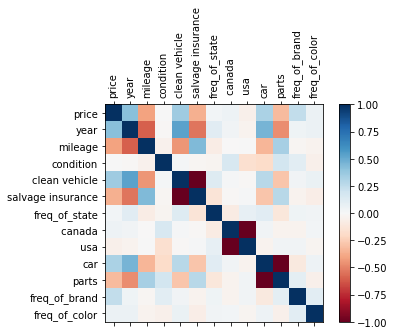

In [21]:
from matplotlib import cm

df_p = pipeline(df)

corr = df_p.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
fig.colorbar(ax.matshow(corr, cmap='RdBu', vmin=-1, vmax=1)) 

ax.set_xticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns)
for tick in ax.get_xticklabels():
  tick.set_rotation(90)

ax.set_yticks(range(len(corr.columns)))
ax.set_yticklabels(corr.columns)

plt.show()

There is not much we can take away from the correlation map, besides some correlation between year with mileage. Price seems to be most correlated with year and mileage (the only nominal variables provided by the dataset). Year and price also seem to have a correlation with title status and model, though this is likely a result from one hot encoding. Something slightly surprising is that condition does not have a noticeable relationship with any other variable.

Looking at this correlation map suggests we could try to adjust how we process the data to see if there are other relationships (one hot encoding brand, color, or state?

# Possible Things to Do

*   Streamline code
*   Explore binary encoding for state, model, color
*   Using NLP to better categorize variables such as model and brand, possibly encoding them ordinally by prestige.
*   Mean encoding, such that we can use it in our ML model

